# Classes and functionality for a Feed Forward Neural Network

In [48]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

Activation functions and their derivatives

In [21]:
class Activation:
    def __init__(self,activation):
        self.activation = activation
    def get_function(self):
        def tanh(z):
            return np.tanh(z)
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))
        def relu(z):
            return np.maximum(z, 0)
        def softmax(z):
            exp_z = np.exp(z)
            return exp_z / np.sum(exp_z, axis=1, keepdims=True)
        if (self.activation == 'tanh'):
            return tanh
        if (self.activation == 'sigmoid'):
            return sigmoid
        if (self.activation == 'relu'):
            return relu
        if (self.activation == 'softmax'):
            return softmax
    def get_derivative(self):
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))
        def tanh_derivative(z):
            return 1.0 - np.tanh(z)**2
        def sigmoid_derivative(output):
            #return np.multiply(sigmoid(z), (1-sigmoid(z)))
            return output*(1-output)
        def relu_derivative(z):
            result = np.empty_like(z)
            result[z<=0] = 0
            result[z>0] = 1
            return result
        if (self.activation == 'tanh'):
            return tanh_derivative
        if (self.activation == 'sigmoid'):
            return sigmoid_derivative
        if (self.activation == 'relu'):
            return relu_derivative
        

Classes for layers

In [93]:
class Layer:
    def __init__(self, input_dim, units, activation):
        self.units = units
        self.activation = activation
        self.input_dim = input_dim
        np.random.seed(0)
        self.weights = np.random.randn(self.input_dim, self.units)/ np.sqrt(self.input_dim)
        self.biases = np.zeros((1,self.units))
    def compute(self,X):
        self.input = X.copy()
        self.output = self.activation.get_function()(X.dot(self.weights)+self.biases)
        return self.output
    def print_info(self):
        print("Layer with %d units and %s activation" %(self.units,self.activation))

In [121]:
class Model2Layers:
    def __init__(self,input_dim, output_dim, hidden_dim,  learning_rate=0.001):
        self.synapse_0 = Layer(input_dim,hidden_dim, Activation("sigmoid"))
        self.synapse_1 = Layer(hidden_dim,output_dim, Activation("sigmoid"))
        self.learning_rate = learning_rate     
        self.layers = [self.synapse_0, self.synapse_1]
    def feed_forward(self,X):
        output = X.copy()
        for l in self.layers:
            output = l.compute(output)
        return output
    def compute_loss(self,X,y):
        output = self.feed_forward(X)
        # Calculating the loss
        num_samples = len(X)
        y_idx = np.argmax(y, axis = 1)
        logprobs = -np.log(output[range(num_samples), y_idx])
        data_loss = np.sum(logprobs)
        return 1./num_samples * data_loss
    def back_propagation(self,X,y):
        for j in xrange(60000):
            # Feed forward through layers 0, 1, and 2
            #out_0 = X
            #out_1 = self.synapse_0.activation.get_function()(np.dot(out_0,self.synapse_0.weights))
            #out_2 = self.synapse_1.activation.get_function()(np.dot(out_1,self.synapse_1.weights))             
            output = self.feed_forward(X)
        
            #compute error
            error_2 = output - y
            
            if (j% 10000) == 0:
                print "Error after "+str(j)+" iterations:" + str(np.mean(np.abs(error_2)))
            
            layer_2_delta = error_2*self.synapse_1.activation.get_derivative()(self.synapse_1.output)
            
            #backprop the error to layer 1
            error_1 = layer_2_delta.dot(self.synapse_1.weights.T)
            
            layer_1_delta = error_1*self.synapse_0.activation.get_derivative()(self.synapse_0.output)

            #update the weights            
            self.synapse_1.weights -= self.learning_rate * (self.synapse_1.input.T.dot(layer_2_delta))
            self.synapse_1.biases -= self.learning_rate * (np.ones((1,self.synapse_1.input.shape[0])).dot(layer_2_delta))
            
            self.synapse_0.weights -= self.learning_rate * (self.synapse_0.input.T.dot(layer_1_delta))
            self.synapse_0.biases -= self.learning_rate * (np.ones((1,self.synapse_0.input.shape[0])).dot(layer_1_delta))
            

In [122]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])   
y = np.array([[0,1,1,0]]).T

m = Model2Layers(learning_rate = 0.8, input_dim= 3, output_dim=1, hidden_dim =5)

m.back_propagation(X,y)

Error after 0 iterations:0.500951768552
Error after 10000 iterations:0.0101362811947
Error after 20000 iterations:0.00678738983095
Error after 30000 iterations:0.00540293835598
Error after 40000 iterations:0.00460541302203
Error after 50000 iterations:0.00407300199454


Error after 0 iterations:0.4514544711
Error after 10000 iterations:0.18982039351
Error after 20000 iterations:0.107813375289
Error after 30000 iterations:0.129160249313
Error after 40000 iterations:0.111567606928
Error after 50000 iterations:0.106038873728


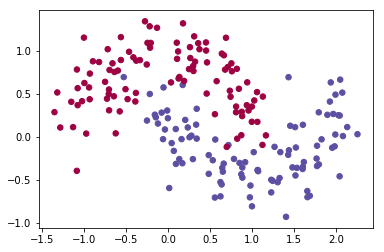

In [82]:
%matplotlib inline
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
y = np.array([y]).T

plt.scatter(X[:,0], X[:,1], s=30, c=y, cmap=plt.cm.Spectral)

m = Model2Layers(learning_rate = 0.8, input_dim= 2, output_dim=1, hidden_dim =5)
m.back_propagation(X,y)

In [98]:
np.ones((1,5))

array([[ 1.,  1.,  1.,  1.,  1.]])

In [22]:
class Model:
    def __init__(self, learning_rate=0.0001):
        self.layers = []
        self.learning_rate = learning_rate
    def add_layer(self,layer):
        self.layers.append(layer)
    def feed_forward(self,X):
        output = X.copy()
        for l in self.layers:
            output = l.compute(output)
            
        return output
    def compute_loss(self,X,y):
        output = self.feed_forward(X)
        # Calculating the loss
        num_samples = len(X)
        y_idx = np.argmax(y, axis = 1)
        logprobs = -np.log(output[range(num_samples), y_idx])
        data_loss = np.sum(logprobs)
        return 1./num_samples * data_loss
    def back_propagation(self,X,y):
        output = self.feed_forward(X)
        num_samples = len(output)
        
        #compute error from output
        # Backpropagation
        #derivative of loss against the prediction function
#         inv_output = 1/output
#         y_idx = np.argmax(y, axis = 1)

#         deriv_loss_f = np.zeros((1, y.shape[1]))
#         for s in range(num_samples):
#             inv_o = 1/output[s]
#             y_cnt = y[s]
#             deriv_loss_f += np.multiply(y_cnt, inv_o)
        deriv_loss_f = np.zeros((1, y.shape[1]))
        for s in range(num_samples):
            deriv_loss_f += output[s] - y[s]
            
            
        for s in range(num_samples):
            for (l,i) in zip(reversed(self.layers), range(0,len(self.layers))):
                # derrivative of the prediction function against z
                z = l.input.dot(l.weights)+l.biases
                deriv_f_z = l.activation.get_derivative()(z)
                deriv_f_z = np.sum(deriv_f_z, axis=0, keepdims=True)

                #derivative of z agains weights
                # for weights the derivative is the input to the current layer
                deriv_z_w = l.input
                deriv_z_w = np.sum(deriv_z_w, axis=0, keepdims=True)

                deriv_loss_z = np.multiply(deriv_loss_f, deriv_f_z)
                deriv_loss_w =  deriv_z_w.T * deriv_loss_z  

                # for biases the derivative is 1
                deriv_loss_b = deriv_loss_z

                # accumulate gradient for lower layers
                deriv_z_x = l.weights.copy()
                deriv_loss_f = deriv_loss_z.dot(l.weights.T)

                #do the update 
                l.weights -= self.learning_rate * deriv_loss_w
                l.biases -= self.learning_rate * deriv_loss_b  


            
            
X = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]])
y = np.array([[0, 1], [0, 1], [0, 1], [0, 1], [0, 1]])
l1 = Layer(2, 5, Activation("sigmoid"))
l2 = Layer(5, 2, Activation("sigmoid"))
m = Model(learning_rate=1e-2)
m.add_layer(l1)
m.add_layer(l2)
#m.feed_forward(X)
print(m.feed_forward(X))

print("loss", m.compute_loss(X,y))

for step in range(10):
    m.back_propagation(X,y)
    print("loss", m.compute_loss(X, y))
    
print(m.feed_forward(X))

[[ 0.77211124  0.60587342]
 [ 0.84070855  0.65797664]
 [ 0.87795018  0.68697731]
 [ 0.89702411  0.69872825]
 [ 0.90720057  0.70251222]]
('loss', 0.40134198478360922)
('loss', nan)
('loss', nan)
('loss', nan)
('loss', nan)
('loss', nan)
('loss', nan)
('loss', nan)
('loss', nan)
('loss', nan)
('loss', nan)
[[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]


C:\Users\carmi\Anaconda2\lib\site-packages\ipykernel\__main__.py:53: RuntimeWarning: overflow encountered in multiply
C:\Users\carmi\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: overflow encountered in multiply
C:\Users\carmi\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log
